In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
df = pd.read_excel('data/Macedonia_AllIndicatorsAvailable_TerritorialRef_1993_2012_CCode_807.xlsx')

/home/simone/Desktop/mobilityinference/mobility_env/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df.head()

,Country Code,Country Name,Indicator,1500,1501,1502,1503,1504,1505,1506,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,807.0,Macedonia,Aluminium Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,807.0,Macedonia,Armed conflicts (Internal),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,807.0,Macedonia,Armed Conflicts (International),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,807.0,Macedonia,Bauxite Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,807.0,Macedonia,Book Titles per Capita,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['Indicator'].unique()

array(['Aluminium Production', 'Armed conflicts (Internal)',
       'Armed Conflicts (International)', 'Bauxite Production',
       'Book Titles per Capita', 'Cattle per Capita',
       'Competitiveness of Executive Recruitment (XRCOMP)',
       'Competitiveness of Participations (PARCOMP)',
       'Composite Measure of Wellbeing', 'Copper Production',
       'Cropland per Capita', 'Exchange Rates to UK Pound',
       'Exchange Rates to US Dollar', 'Executive Constraints (XCONST)',
       'Female life expectancy at Birth', 'GDP per Capita',
       'Gender Equality of Numeracy',
       'Global Extreme Poverty Cost of Basic Needs',
       'Global Extreme Poverty Dollar a Day', 'Goats per Capita',
       'Gold Production', 'Height', 'Height Gini', 'Homicide Rates',
       'Income Inequality', 'Infant Mortality', 'Inflation',
       'Iron Ore Production', 'Latent Democracy Variable',
       'Lead Production', 'Life Expectancy at Birth (Total)',
       'Male life Expectancy at Birth', 'Nick

In [5]:
ts_list=['GDP per Capita','Pasture per Capita','Copper Production']


def time_series_from_raw_data(df,ts_list):
    
    #getting the indicators we want
    df_cut = df.loc[df['Indicator'].isin(ts_list)]
    
    #list of years not nan
    not_nan_list=list(df_cut.stack()
       .reset_index(level=1)
       .groupby(level=0, sort=False)
       ['level_1'].apply(list)
    )
    
    #get intersection between the variables definition years
    set_common=set.intersection(*map(set,not_nan_list))
    set_common.difference_update(['Country Code',
     'Country Name'])
    
    #cut and reindex
    d=df_cut[list(set_common)]
    d=d.reindex(sorted(d.columns), axis=1).set_index('Indicator').T
    
    return d

In [6]:
dd=time_series_from_raw_data(df,ts_list)
dd.head()

Indicator,Copper Production,GDP per Capita,Pasture per Capita
1960,2.750678,3586.00,0.734118
1970,6.994580,6545.00,0.710585
1980,10.295390,9899.00,0.699801
1990,10.924120,9173.00,0.684333
2000,6.000000,8083.79,0.434898


## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ts_list

x = d.loc[:, features].values# Separating out the target
x = StandardScaler().fit_transform(x)
x

array([[-1.72727751, -1.26260789, -1.55534274],
       [-0.40706529, -0.67297982, -0.13347064],
       [ 1.08938345,  1.09183397,  0.97242899],
       [ 0.7654652 ,  1.25998721,  1.18307798],
       [ 0.27949415, -0.41623347, -0.46669359]])

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [39]:
principalDf

,principal component 1,principal component 2
0,2.622182,-0.308028
1,0.699656,0.041308
2,-1.820048,0.051105
3,-1.855646,-0.360046
4,0.353855,0.575661


In [40]:
pca.explained_variance_ratio_

array([0.94977105, 0.03734789])

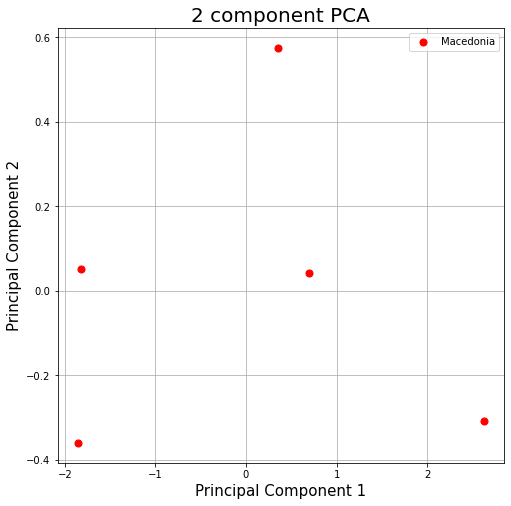

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Macedonia']
colors = ['r']
for target, color in zip(targets,colors):
    # indicesToKeep = finalDf['target'] == target
    ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()